# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Ahmad Hilmy Rakha Alcander]
- **Email:** [ahmadhilmy.22052@mhs.unesa.ac.id]
- **ID Dicoding:** [rakhaalcander]

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara peminjaman, cuaca, dan holiday/weekday
- Pada cuaca apa yang menyebabkan peminjaman sepeda menurun?

## Import Semua Packages/Library yang Digunakan

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [82]:
day_df = pd.read_csv(Bike-sharing-dataset/day.csv)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [83]:
hour_df = pd.read_csv(Bike-sharing-dataset/hour.csv)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Memiliki jumlah fitur dan baris yg berbeda diantara 2 dataset tsb
- kolom hr pada dataset hour adalah pembeda yang tidak ada di dataset day

### Assessing Data

# Menilai tabel day

In [84]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [116]:
day_df.holiday.value_counts()

holiday
0    710
1     21
Name: count, dtype: int64

In [87]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


# Menilai tabel hour

In [88]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [118]:
hour_df.holiday.value_counts()

holiday
0    16879
1      500
Name: count, dtype: int64

In [119]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Terdapat 2 kategori dalam kolom "holiday", dgn total 16.789 data yg diitung tiap jam

### Cleaning Data

In [89]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [90]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [91]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [92]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [121]:
Q1 = day_df['cnt'].quantile(0.25)
Q3 = day_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

clean_data = day_df[(day_df['cnt'] >= lower_bound) & (day_df['cnt'] <= upper_bound)]

print("Data tanpa outliers:")
print(clean_data.shape)

Data tanpa outliers:
(731, 16)


In [123]:
Q1 = hour_df['cnt'].quantile(0.25)
Q3 = hour_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

clean_data1 = hour_df[(hour_df['cnt'] >= lower_bound) & (hour_df['cnt'] <= upper_bound)]

print("Data tanpa outliers:")
print(clean_data1.shape)

Data tanpa outliers:
(16874, 17)


In [189]:
clean_data.to_csv(clean_data.csv",index=False)
clean_data1.to_csv(clean_data1.csv",index=False)

**Insight:**
- Tidak ada data yang kosong di 2 dataset
- Tidak ada data yang duplikat di 2 dataset

## Exploratory Data Analysis (EDA)

### Explore day

In [168]:
clean_data = pd.read_csv(dashboard/clean_data.csv")

In [169]:
clean_data.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
702,703,2012-12-03,4,1,12,0,1,1,1,0.452500,0.455796,0.767500,0.082721,555,5679,6234
141,142,2011-05-22,2,0,5,0,0,0,1,0.604167,0.574500,0.749583,0.148008,1576,3084,4660
35,36,2011-02-05,1,0,2,0,6,0,2,0.233333,0.243058,0.929167,0.161079,100,905,1005
249,250,2011-09-07,3,0,9,0,3,1,3,0.599167,0.544229,0.917083,0.097021,118,1878,1996
194,195,2011-07-14,3,0,7,0,4,1,1,0.680833,0.635104,0.476250,0.240667,888,4196,5084


In [170]:
clean_data.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [171]:
print(clean_data[['cnt']].describe())
average_cnt = clean_data['cnt'].mean()
max_cnt = clean_data['cnt'].max()
min_cnt = clean_data['cnt'].min()

print(f'Rata-rata total peminjaman sepeda dalam jam: {average_cnt}')
print(f'Nilai maksimum peminjaman sepeda dalam jam: {max_cnt}')
print(f'Nilai minimum peminjaman sepeda dalam jam: {min_cnt}')

               cnt
count   731.000000
mean   4504.348837
std    1937.211452
min      22.000000
25%    3152.000000
50%    4548.000000
75%    5956.000000
max    8714.000000
Rata-rata total peminjaman sepeda dalam jam: 4504.3488372093025
Nilai maksimum peminjaman sepeda dalam jam: 8714
Nilai minimum peminjaman sepeda dalam jam: 22


In [172]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [173]:
clean_data.instant.is_unique

True

In [174]:
clean_data.instant.duplicated

<bound method Series.duplicated of 0        1
1        2
2        3
3        4
4        5
      ... 
726    727
727    728
728    729
729    730
730    731
Name: instant, Length: 731, dtype: int64>

In [175]:
clean_data.groupby(by="weathersit").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std", ]
})

instant   cnt                               
           nunique   max  min         mean          std
weathersit                                             
1              463  8714  431  4876.786177  1879.483989
2              247  8362  605  4035.862348  1809.109918
3               21  4639   22  1803.285714  1240.284449

In [176]:
clean_data.groupby(by="holiday").instant.nunique().sort_values(ascending=False)

holiday
0    710
1     21
Name: instant, dtype: int64

In [177]:
clean_data.groupby(by="weekday").instant.nunique().sort_values(ascending=False)

weekday
0    105
1    105
6    105
2    104
3    104
4    104
5    104
Name: instant, dtype: int64

### Explore hour

In [190]:
clean_data1 = pd.read_csv(dashboard/clean_data1.csv")

In [191]:
clean_data1.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
3702,3703,2011-06-08,2,0,6,4,0,3,1,1,0.62,0.5758,0.83,0.0000,0,6,6
4557,4558,2011-07-13,3,0,7,19,0,3,1,1,0.70,0.6667,0.79,0.1045,79,340,419
4038,4039,2011-06-22,3,0,6,4,0,3,1,1,0.64,0.5758,0.83,0.0000,3,8,11
8724,8726,2012-01-04,1,1,1,9,0,3,1,1,0.04,0.0606,0.45,0.1343,7,173,180
11430,11510,2012-04-29,2,1,4,18,0,0,0,1,0.60,0.6061,0.26,0.2836,164,323,487


In [182]:
clean_data1.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,16874.000000,16874,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8542.168899,NaN,2.490399,0.487733,6.513275,11.458101,0.029513,2.997748,0.678618,1.430663,0.492650,0.471970,0.630412,0.189619,33.418632,139.291514,172.710146
std,5007.766040,NaN,1.111966,0.499864,3.462438,6.962144,0.169244,2.013054,0.467021,0.642689,0.192455,0.171878,0.192600,0.122460,45.896591,126.052802,155.020918
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4219.250000,NaN,1.000000,0.000000,4.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,32.000000,38.000000
50%,8438.500000,NaN,2.000000,0.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.179100,15.000000,111.000000,135.000000
75%,12832.750000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.621200,0.790000,0.253700,45.000000,208.000000,265.750000


In [183]:
print(clean_data1[['cnt']].describe())
average_cnt = clean_data1['cnt'].mean()
max_cnt = clean_data1['cnt'].max()
min_cnt = clean_data1['cnt'].min()

print(f'Rata-rata total peminjaman sepeda dalam jam: {average_cnt}')
print(f'Nilai maksimum peminjaman sepeda dalam jam: {max_cnt}')
print(f'Nilai minimum peminjaman sepeda dalam jam: {min_cnt}')

                cnt
count  16874.000000
mean     172.710146
std      155.020918
min        1.000000
25%       38.000000
50%      135.000000
75%      265.750000
max      642.000000
Rata-rata total peminjaman sepeda dalam jam: 172.71014578641697
Nilai maksimum peminjaman sepeda dalam jam: 642
Nilai minimum peminjaman sepeda dalam jam: 1


In [184]:
clean_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16874 entries, 0 to 16873
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     16874 non-null  int64  
 1   dteday      16874 non-null  object 
 2   season      16874 non-null  int64  
 3   yr          16874 non-null  int64  
 4   mnth        16874 non-null  int64  
 5   hr          16874 non-null  int64  
 6   holiday     16874 non-null  int64  
 7   weekday     16874 non-null  int64  
 8   workingday  16874 non-null  int64  
 9   weathersit  16874 non-null  int64  
 10  temp        16874 non-null  float64
 11  atemp       16874 non-null  float64
 12  hum         16874 non-null  float64
 13  windspeed   16874 non-null  float64
 14  casual      16874 non-null  int64  
 15  registered  16874 non-null  int64  
 16  cnt         16874 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.2+ MB


In [185]:
clean_data1.instant.is_unique

True

In [186]:
clean_data1.instant.duplicated

<bound method Series.duplicated of 0            1
1            2
2            3
3            4
4            5
         ...  
16869    17375
16870    17376
16871    17377
16872    17378
16873    17379
Name: instant, Length: 16874, dtype: int64>

In [187]:
clean_data1.groupby(by="hr").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std", ]
})

instant  cnt                            
   nunique  max min        mean         std
hr                                         
0      726  283   2   53.898072   42.307910
1      724  168   1   33.375691   33.538727
2      715  132   1   22.869930   26.578642
3      697   79   1   11.727403   13.239190
4      697   28   1    6.352941    4.143818
5      717   66   1   19.889819   13.200765
6      725  213   1   76.044138   55.084348
7      727  596   1  212.064649  161.441936
8      600  641   5  284.525000  186.288544
9      727  426  14  219.309491   93.703458
10     727  539   8  173.668501  102.205413
11     725  627  10  206.910345  125.485902
12     711  642   3  242.828411  129.641070
13     706  638  11  239.559490  127.728180
14     714  640  12  231.647059  133.812396
15     716  640   7  243.256983  133.067966
16     718  642  11  305.750696  141.727765
17     577  638  15  372.551127  169.831967
18     599  642  23  349.410684  165.432882
19     714  640  11  304.474790  154.421247
20     728  567  11  226.030220  119.670164
21     728  584   6  172.314560   89.788893
22     728  502   9  131.335165   69.937782
23     728  256   2   87.831044   50.846889

**Insight:**
- Nilai rata2 pinjam sepeda dalam jam (day):4504.3488372093025
- Nilai rata2 pinjam sepeda dalam jam (hour):172.71014578641697
- Nilai max pinjam sepeda dalam jam (day):8714
- Nilai max pinjam sepeda dalam jam (hour):642
- Nilai min pinjam sepeda dalam jam (day):22
- Nilai min pinjam sepeda dalam jam (hour):1

## Visualization & Explanatory Analysis

### Day

In [153]:
avg_rentals = clean_data.groupby('holiday')['cnt'].mean()
print(avg_rentals)

holiday
0    4527.104225
1    3735.000000
Name: cnt, dtype: float64


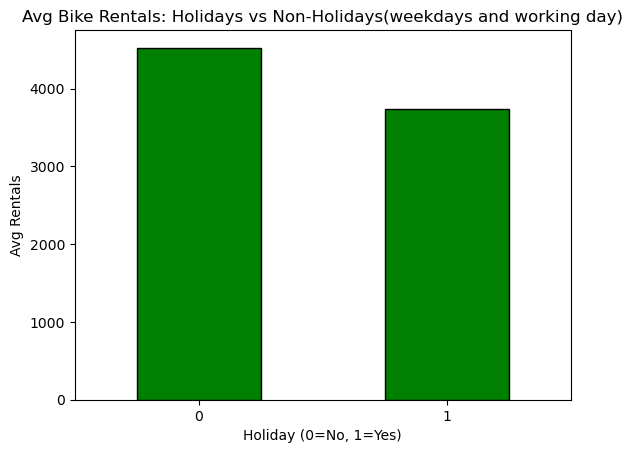

In [154]:
avg_rentals.plot(kind='bar', edgecolor= 'black', color='green')
plt.title('Avg Bike Rentals: Holidays vs Non-Holidays(weekdays and working day)')
plt.xlabel('Holiday (0=No, 1=Yes)')
plt.ylabel('Avg Rentals')
plt.xticks(rotation=0)
plt.show()

In [155]:
print(clean_data['weathersit'].value_counts())

weathersit
1    463
2    247
3     21
Name: count, dtype: int64


In [156]:
avg_rentals_weather = clean_data.groupby('weathersit')['cnt'].mean()
print(avg_rentals_weather)

weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64


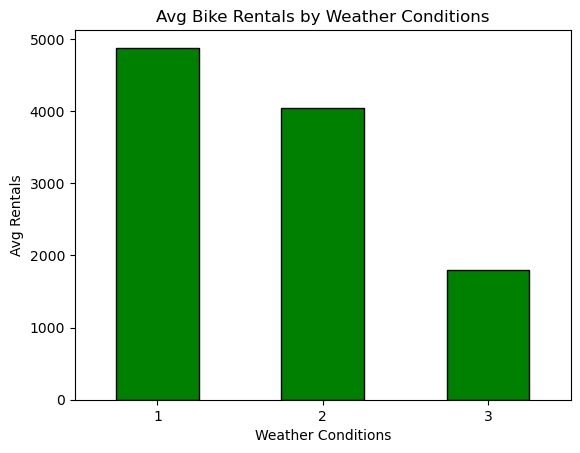

In [195]:
avg_rentals_weather.plot(kind='bar', color='green', edgecolor='black')
plt.title('Avg Bike Rentals by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Avg Rentals')
plt.xticks(rotation=0)
plt.show()

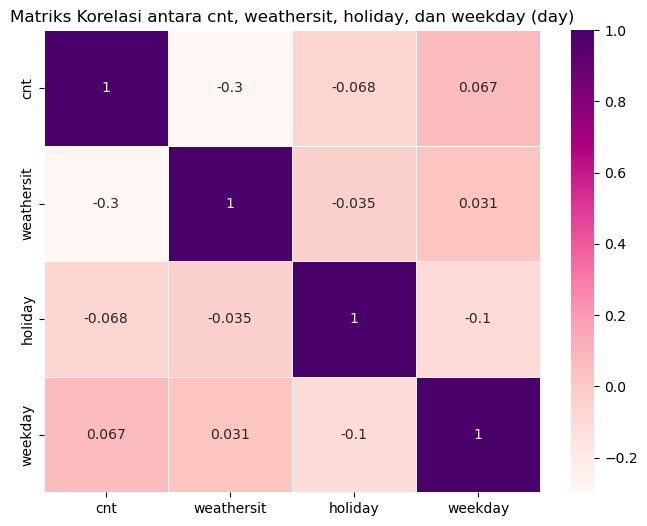

In [206]:
correlation_matrix = clean_data[['cnt', 'weathersit', 'holiday', 'weekday']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdPu', linewidths=0.5)
plt.title('Matriks Korelasi antara cnt, weathersit, holiday, dan weekday (day)')
plt.show()

### Hour

In [158]:
avgs_rentals = clean_data1.groupby('holiday')['cnt'].mean()
print(avgs_rentals)

holiday
0    173.257450
1    154.712851
Name: cnt, dtype: float64


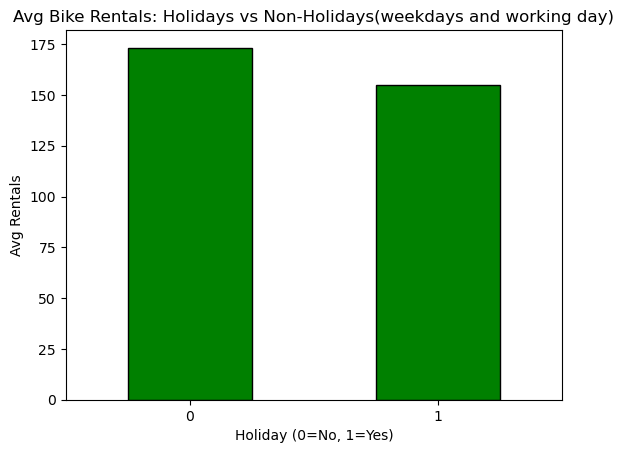

In [159]:
avgs_rentals.plot(kind='bar', edgecolor= 'black', color='green')
plt.title('Avg Bike Rentals: Holidays vs Non-Holidays(weekdays and working day)')
plt.xlabel('Holiday (0=No, 1=Yes)')
plt.ylabel('Avg Rentals')
plt.xticks(rotation=0)
plt.show()

In [160]:
print(clean_data1['weathersit'].value_counts())

weathersit
1    11020
2     4444
3     1407
4        3
Name: count, dtype: int64


In [161]:
avgs_rentals_weather = clean_data1.groupby('weathersit')['cnt'].mean()
print(avgs_rentals_weather)

weathersit
1    185.314247
2    162.626463
3    106.050462
4     74.333333
Name: cnt, dtype: float64


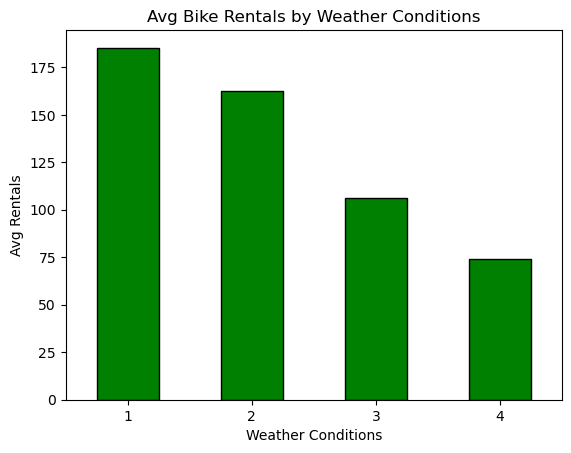

In [193]:
avgs_rentals_weather.plot(kind='bar', color='green', edgecolor='black')
plt.title('Avg Bike Rentals by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Avg Rentals')
plt.xticks(rotation=0)
plt.show()

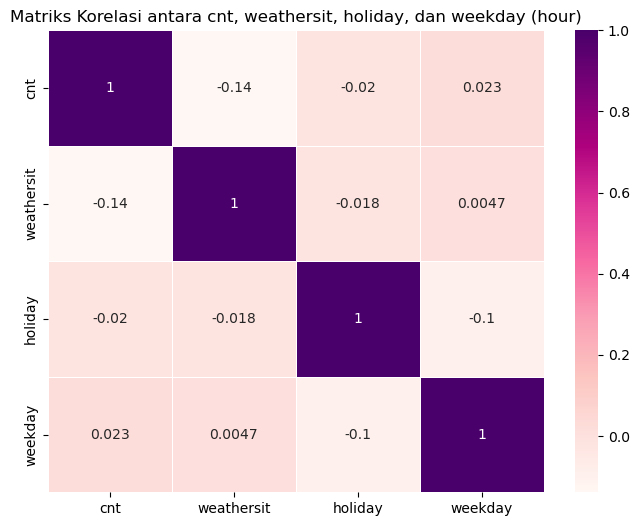

In [207]:
correlation_matrix = clean_data1[['cnt', 'weathersit', 'holiday', 'weekday']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdPu', linewidths=0.5)
plt.title('Matriks Korelasi antara cnt, weathersit, holiday, dan weekday (hour)')
plt.show()

**Insight:**
### Day

Rata rata yang sewa sepeda lebih banyak di weekend dengan 
- 0    (4527.104225)
- 1    (3735.000000)

Rata rata yang sewa berdasarkan cuaca adalah
- 1    (4876.786177)
- 2    (4035.862348)
- 3    (1803.285714)

### Hour

Rata rata yang sewa sepeda lebih banyak di weekend dengan
- 0    (173.257450)
- 1    (154.712851)

Rata rata yang sewa berdasarkan cuaca adalah
- 1    (185.314247)
- 2    (162.626463)
- 3    (106.050462)
- 4     (74.333333)

# Pertanyaan 1: Bagaimana hubungan antara peminjaman, cuaca, dan holiday/weekday

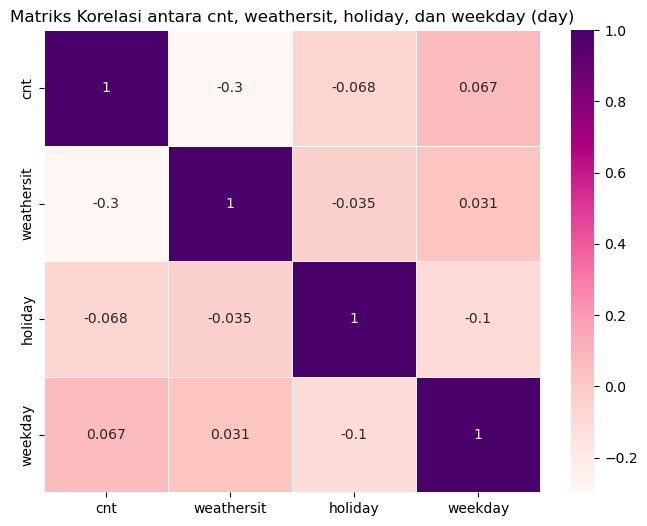

In [205]:
correlation_matrix = clean_data[['cnt', 'weathersit', 'holiday', 'weekday']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdPu', linewidths=0.5)
plt.title('Matriks Korelasi antara cnt, weathersit, holiday, dan weekday (day)')
plt.show()

### Day
Hubungan antara "cnt" dengan variabel lainnya:

- "weathersit": Korelasi negatif (-0.3) menunjukkan bahwa ketika cuaca memburuk (nilai "weathersit" lebih tinggi), jumlah sepeda sewaan cenderung berkurang.
- "holiday": Korelasi negatif (-0.068) menunjukkan sedikit kecenderungan penurunan jumlah sepeda sewaan pada hari libur.
- "weekday": Korelasi positif (0.067) menunjukkan sedikit kecenderungan peningkatan jumlah sepeda sewaan pada hari hari tertentu dalam seminggu.

Hubungan antara "weathersit" dengan variabel lainnya:

- "holiday": Korelasi negatif (-0.035) menunjukkan sedikit kecenderungan penurunan jumlah sepeda sewaan pada hari libur ketika cuaca memburuk.
- "weekday": Korelasi positif (0.031) menunjukkan sedikit kecenderungan peningkatan jumlah sepeda sewaan pada hari hari tertentu dalam seminggu ketika cuaca memburuk.

Hubungan antara "holiday" dengan "weekday":

- Korelasi negatif (-0.1) menunjukkan sedikit kecenderungan penurunan jumlah sepeda sewaan pada hari hari tertentu dalam seminggu yang juga merupakan hari libur.

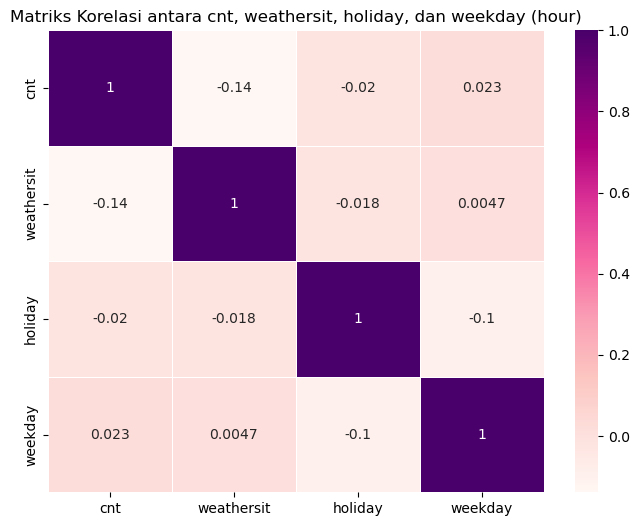

In [208]:
correlation_matrix = clean_data1[['cnt', 'weathersit', 'holiday', 'weekday']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdPu', linewidths=0.5)
plt.title('Matriks Korelasi antara cnt, weathersit, holiday, dan weekday (hour)')
plt.show()

### Hour
Korelasi Negatif antara cnt dan weathersit:

- Korelasi negatif (-0.14) menunjukkan bahwa ketika kondisi cuaca memburuk (nilai weathersit lebih tinggi), jumlah sepeda yang disewa cenderung menurun. Ini menunjukkan bahwa orang cenderung kurang menyewa sepeda pada hari hujan atau bersalju.

Korelasi Lemah antara cnt dengan holiday/weekday:

- Korelasi antara cnt dan holiday (-0.02) serta cnt dan weekday (0.023) keduanya sangat lemah. Ini menunjukkan bahwa apakah hari tersebut adalah hari libur atau hari dalam seminggu memiliki dampak minimal terhadap jumlah sepeda yang disewa.

# Pertanyaan 2: Pada cuaca apa yang menyebabkan peminjaman sepeda menurun?

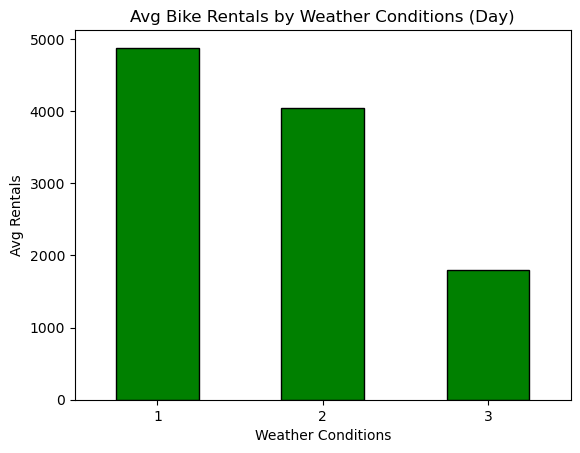

In [210]:
avg_rentals_weather.plot(kind='bar', color='green', edgecolor='black')
plt.title('Avg Bike Rentals by Weather Conditions (Day)')
plt.xlabel('Weather Conditions')
plt.ylabel('Avg Rentals')
plt.xticks(rotation=0)
plt.show()

### Day

- Kondisi Cuaca 1: Rata-rata penyewaan sepeda yang tinggi menunjukkan bahwa pada hari-hari dengan cuaca cerah atau sedikit berawan, masyarakat cenderung lebih aktif menggunakan sepeda untuk transportasi atau rekreasi.

- Kondisi Cuaca 2: Meskipun cuaca berkabut atau berawan tidak sepenuhnya buruk, namun rata-rata penyewaan sepeda lebih rendah dibandingkan dengan kondisi cuaca 1. Hal ini mungkin disebabkan oleh faktor-faktor seperti visibilitas yang terbatas atau ketidaknyamanan cuaca.

- Kondisi Cuaca 3: Rata-rata penyewaan sepeda yang terendah menunjukkan bahwa cuaca buruk seperti hujan, salju, atau badai secara signifikan mengurangi minat masyarakat untuk menggunakan sepeda.

Dan yang terburuk adalah kondisi cuaca 3. Pada kondisi cuaca ini, adanya hujan ringan, salju, atau badai membuat orang cenderung enggan untuk bersepeda karena faktor kenyamanan dan keamanan. Jalan yang basah dan licin dapat meningkatkan risiko kecelakaan.

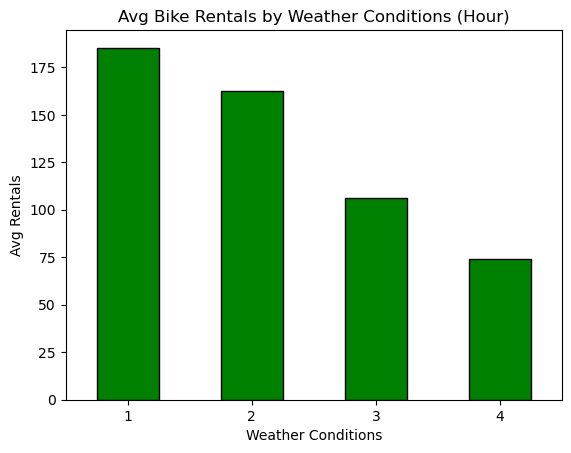

In [212]:
avgs_rentals_weather.plot(kind='bar', color='green', edgecolor='black')
plt.title('Avg Bike Rentals by Weather Conditions (Hour)')
plt.xlabel('Weather Conditions')
plt.ylabel('Avg Rentals')
plt.xticks(rotation=0)
plt.show()

### Hour

- Kondisi Cuaca 1: Memiliki rata-rata penyewaan sepeda yang tertinggi, sekitar 180 sepeda per jam.
- Kondisi Cuaca 2: Rata-rata penyewaan sepeda lebih rendah daripada kondisi cuaca 1, sekitar 165 sepeda per jam.
- Kondisi Cuaca 3: Rata-rata penyewaan sepeda lebih rendah lagi, sekitar 105 sepeda per jam.
- Kondisi Cuaca 4: Memiliki rata-rata penyewaan sepeda yang terendah, sekitar 75 sepeda per jam.

Dan yang terburuk adalah kondisi cuaca 4. Kondisi cuaca ini merupakan kondisi yang paling buruk. Hujan lebat, salju, atau badai yang disertai angin kencang dan suhu dingin membuat bersepeda menjadi sangat tidak nyaman dan bahkan berbahaya.

## Conclusion

## Conclution pertanyaan 1

**Pengaruh Cuaca (weathersit)**
- Pengaruh Dominan: Cuaca memiliki pengaruh paling signifikan terhadap jumlah sepeda yang disewa. Korelasi negatif yang kuat antara cnt dan weathersit menunjukkan bahwa semakin buruk kondisi cuaca, semakin sedikit orang yang menyewa sepeda.

**Pengaruh Hari Libur (holiday) dan Hari dalam Seminggu (weekday)**
- Pengaruh Lemah: Baik hari libur maupun hari dalam seminggu memiliki pengaruh yang sangat kecil terhadap jumlah sepeda yang disewa. Korelasi yang mendekati nol menunjukkan bahwa faktor-faktor ini tidak memberikan kontribusi signifikan dalam menjelaskan variasi jumlah penyewaan sepeda.
- Potensi Faktor Lain: Kemungkinan ada faktor lain yang lebih kuat mempengaruhi jumlah penyewaan sepeda pada hari libur atau hari kerja tertentu, seperti acara khusus, musim, atau tren jangka panjang.

**Interaksi antara Variabel**
- Interaksi yang lemah antara cuaca, hari libur, dan hari dalam seminggu. Ini berarti, pengaruh cuaca terhadap jumlah penyewaan sepeda tidak terlalu dipengaruhi oleh apakah hari tersebut adalah hari libur atau hari kerja.


## Conclution pertanyaan 2

Secara umum, cuaca buruk merupakan faktor utama yang menyebabkan penurunan peminjaman sepeda. Kondisi cuaca yang ekstrim seperti hujan lebat, salju, atau badai (Kondisi Cuaca 3 dan 4) sangat mengurangi minat masyarakat untuk menggunakan sepeda. Hal ini disebabkan oleh beberapa faktor, antara lain:

- Keamanan: Jalanan yang licin atau banjir meningkatkan risiko kecelakaan.
- Kenyamanan: Cuaca buruk seperti hujan dan angin membuat bersepeda menjadi tidak nyaman.
- Visibilitas: Cuaca berkabut atau hujan deras dapat mengurangi visibilitas, sehingga bersepeda menjadi lebih berbahaya.

Selain cuaca ekstrim, cuaca yang kurang mendukung seperti berkabut atau berawan (Kondisi Cuaca 2) juga dapat mengurangi jumlah peminjaman sepeda. Hal ini mungkin disebabkan oleh faktor-faktor seperti visibilitas yang terbatas atau ketidaknyamanan cuaca. Sebaliknya, cuaca yang cerah atau sedikit berawan (Kondisi Cuaca 1) sangat mendukung aktivitas bersepeda. Cuaca yang baik mendorong masyarakat untuk lebih aktif menggunakan sepeda untuk transportasi atau rekreasi. Perlu mempertimbangkan faktor lain seperti adanya acara/event khusus di suatu area dapat meningkatkan atau menurunkan jumlah peminjaman sepeda.